In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load the data
data = np.loadtxt(fname='widget_data.txt',delimiter=',')

# design matrix
X = np.concatenate((np.ones((1000,1)),data[:,:2]),axis=1)

# outcome variable
y = data[:,2]

# beta coefficients
beta = np.linalg.lstsq(X,y)[0]

# scaled coefficients (intercept not scaled)
betaScaled = beta/np.std(X,axis=0,ddof=1)

<ipython-input-4-bfea51dbda64>:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta = np.linalg.lstsq(X,y)[0]
<ipython-input-4-bfea51dbda64>:14: RuntimeWarning: divide by zero encountered in true_divide
  betaScaled = beta/np.std(X,axis=0,ddof=1)


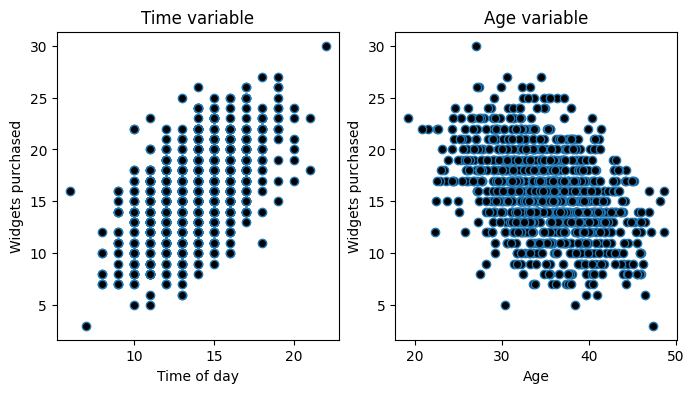

In [5]:
# setup the figure
fig,ax = plt.subplots(1,2,figsize=(8,4))

# plot widgets by time
ax[0].plot(X[:,1],y,'o',markerfacecolor='k')
ax[0].set_title('Time variable')
ax[0].set_xlabel('Time of day')
ax[0].set_ylabel('Widgets purchased')

# plot widgets by age
ax[1].plot(X[:,2],y,'o',markerfacecolor='k')
ax[1].set_title('Age variable')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Widgets purchased')
plt.show()

In [6]:
# predicted data
yHat = X@beta

# r-squared
r2 = 1 - np.sum((yHat-y)**2) / np.sum((y-np.mean(y))**2)
r2

0.3663899451013618